# Q.1) Company 
Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [159]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [160]:
company_data=pd.read_csv('Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [161]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [162]:
#check for missing values
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [163]:
#check for duplicate record
company_data.duplicated().sum()

np.int64(0)

In [164]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


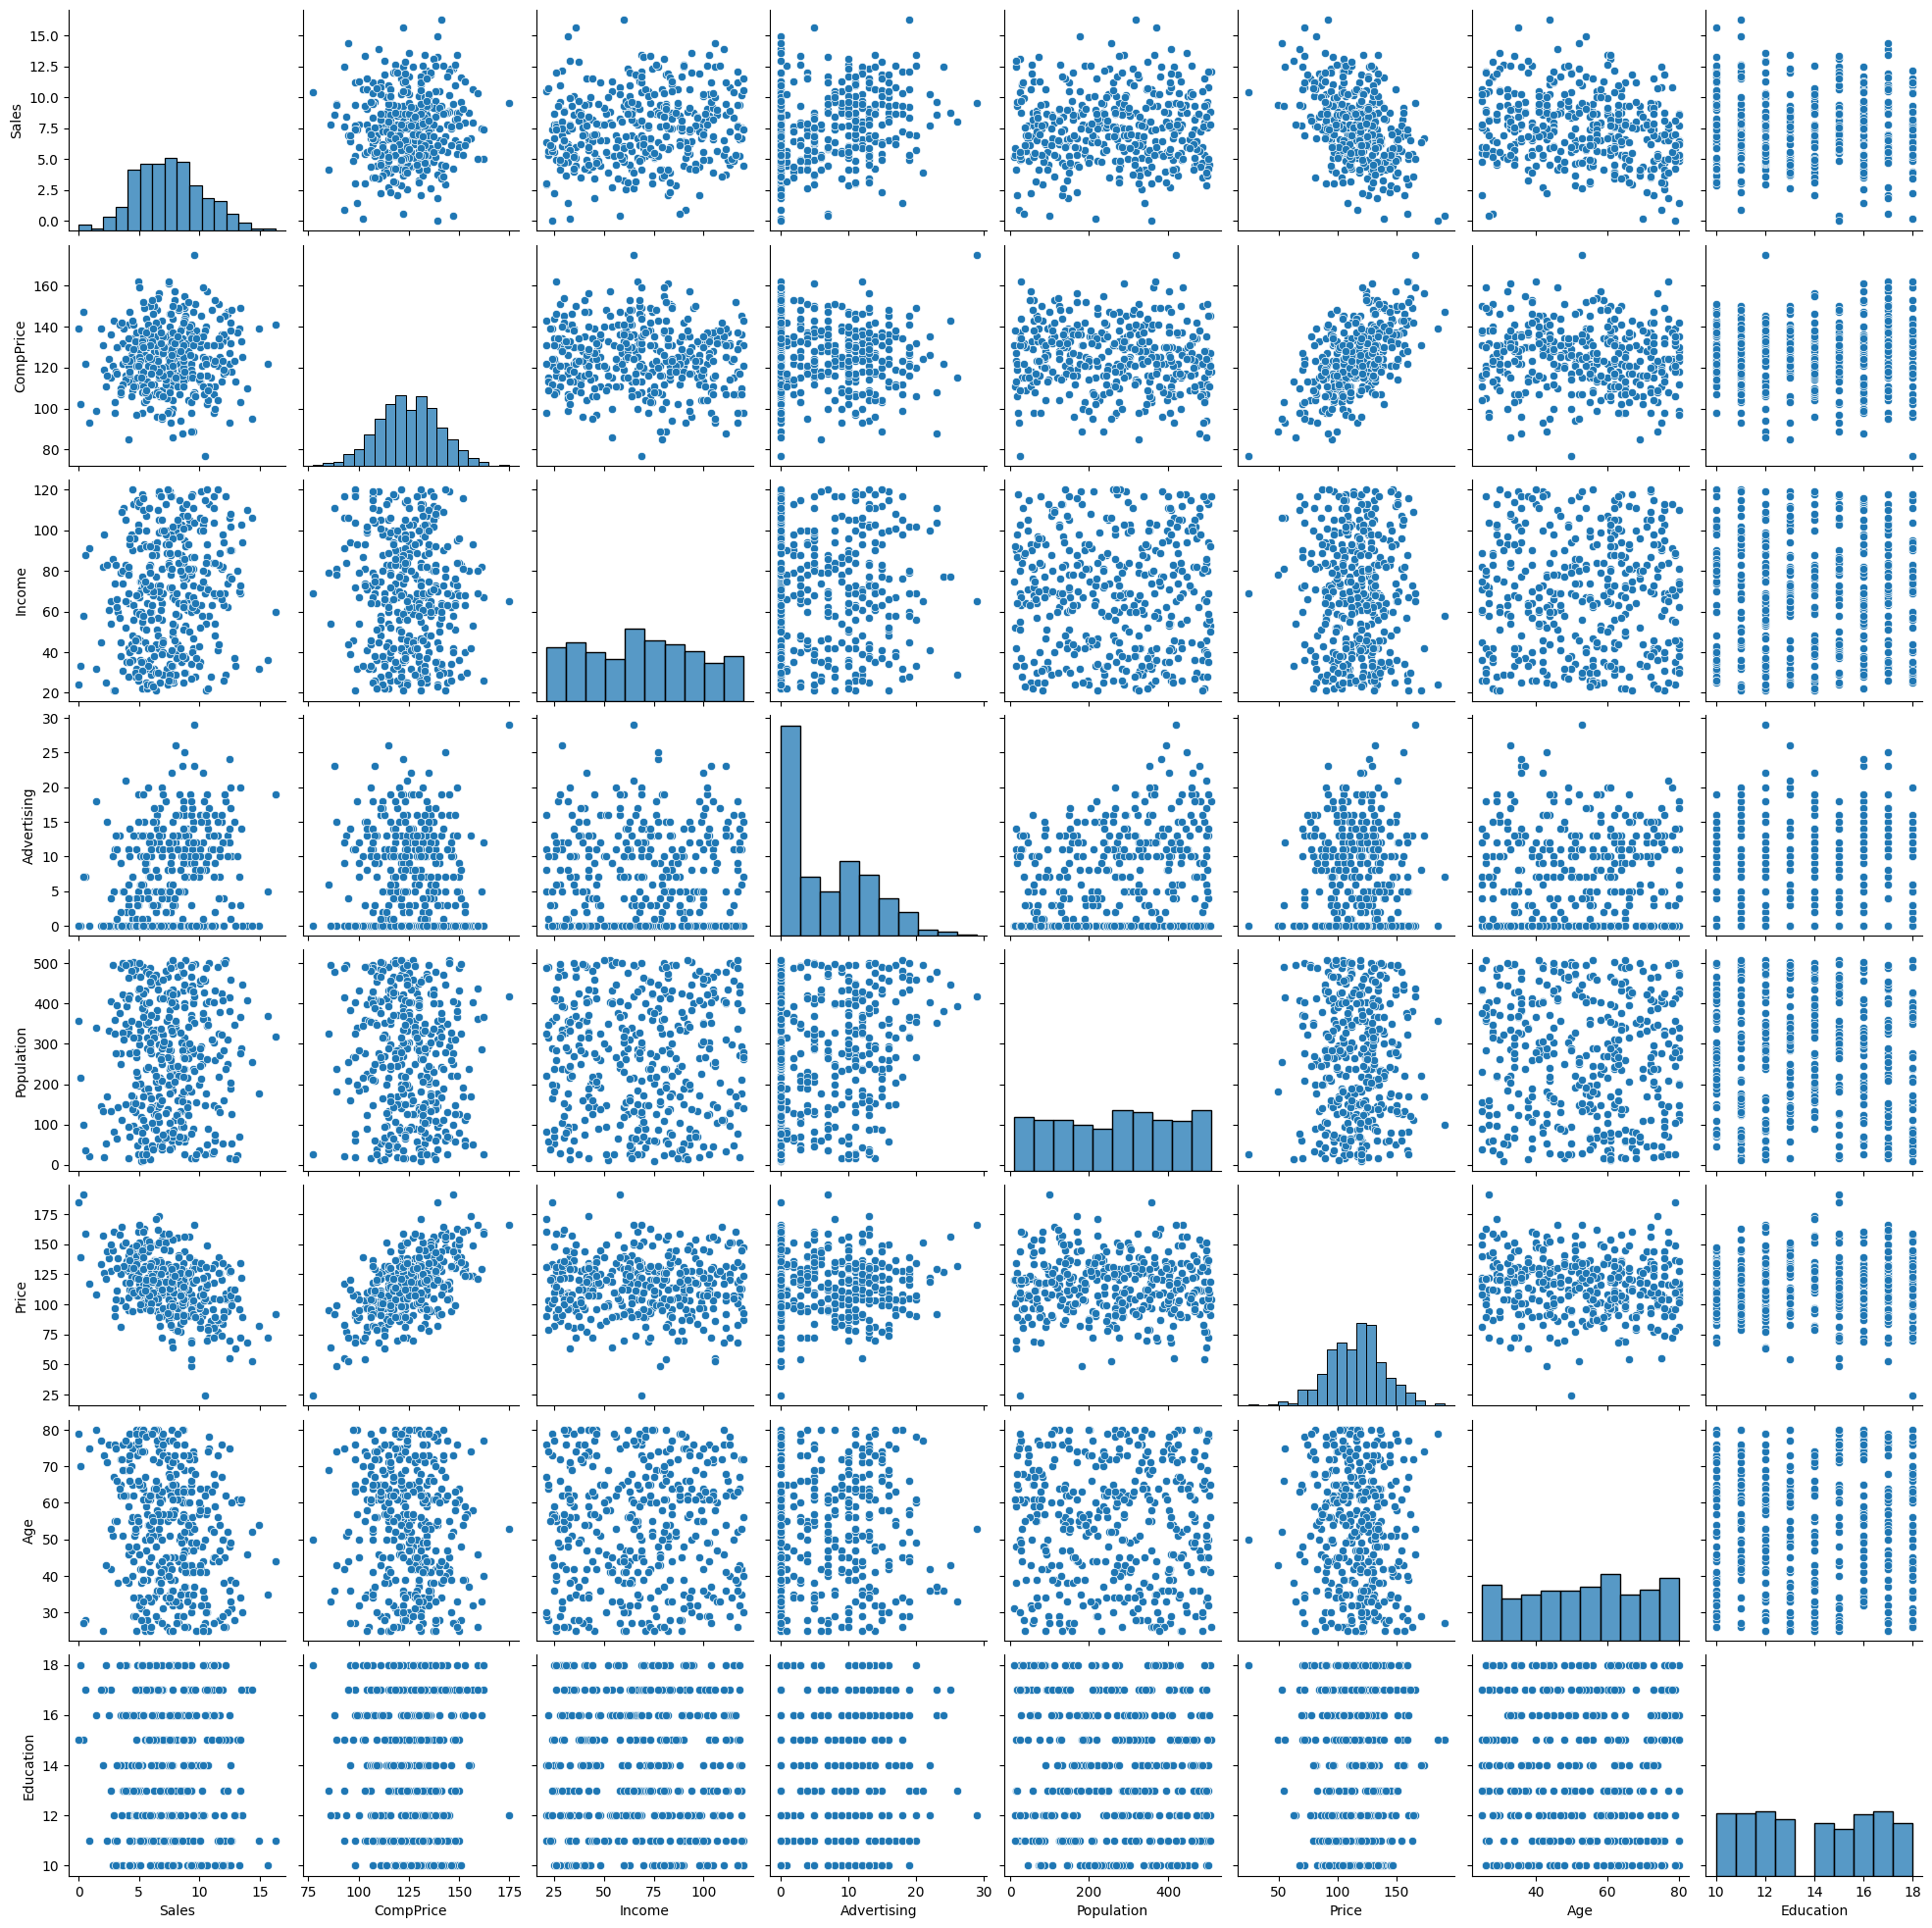

In [165]:
# pairplot
import seaborn as sns
sns.pairplot(company_data)

In [166]:
for i in company_data.columns:
    if company_data[i].dtype=='object':
        print(f"{i} : {company_data[i].unique()}")

ShelveLoc : ['Bad' 'Good' 'Medium']
Urban : ['Yes' 'No']
US : ['Yes' 'No']


## histograms

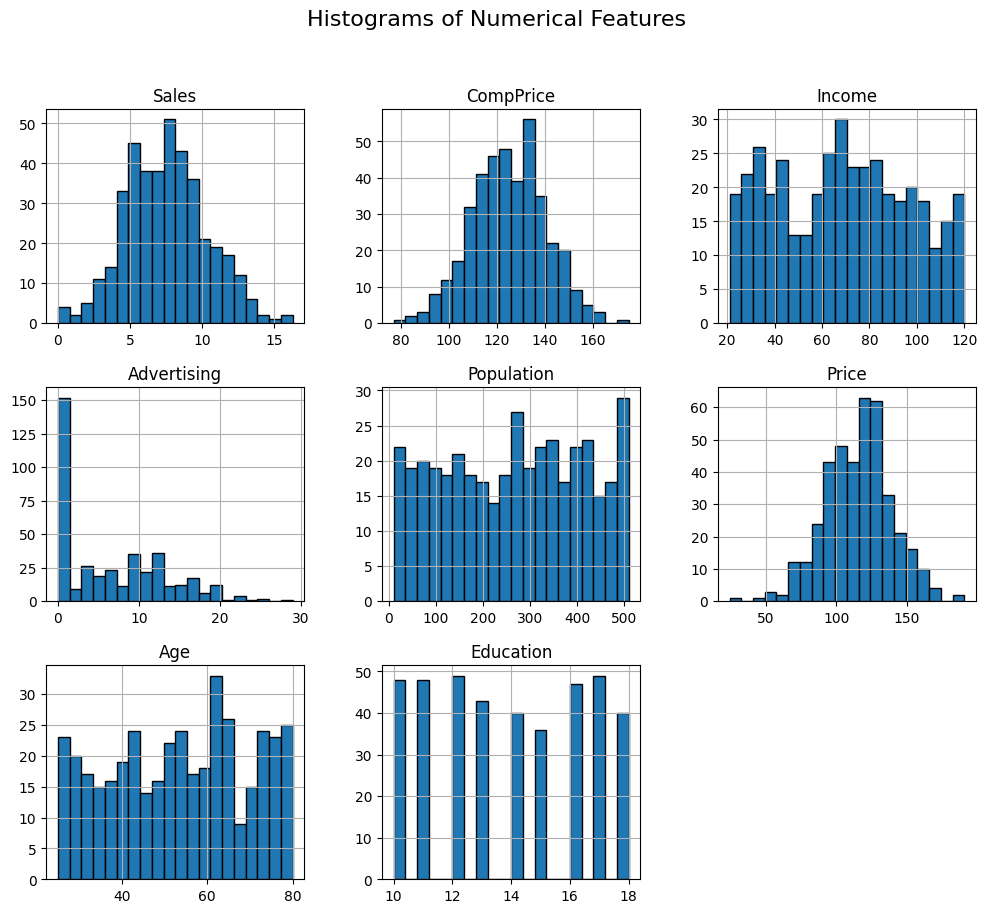

In [167]:
# Select only numerical columns
from matplotlib import pyplot as plt
numerical_cols = company_data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
company_data[numerical_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

#### Insights for Modeling

Normal distributions (Sales, CompPrice, Price): Trees will split smoothly; no preprocessing needed.

Uniform distributions (Income, Population, Age): Trees can handle, but splits might not be very strong (low information gain).

Skewed distribution (Advertising): Very skewed — you may consider log transform to reduce skewness. This often helps tree-based models generalize better.

Discrete numerical (Education): Treat as categorical if needed, since values are limited.

#### removing skewness from "Advertising" feature

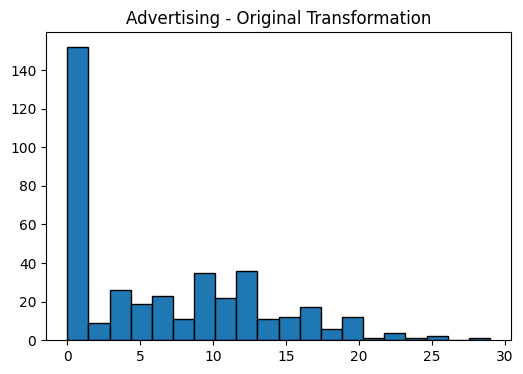

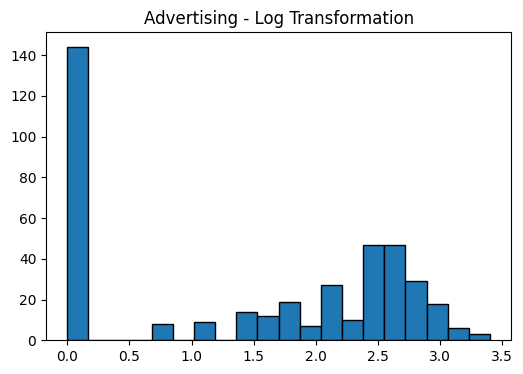

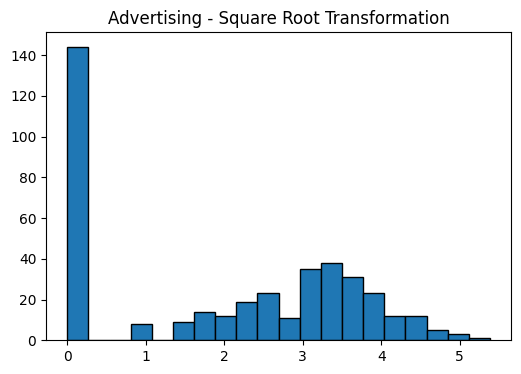

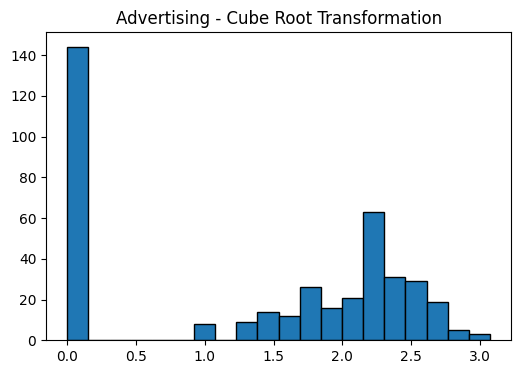

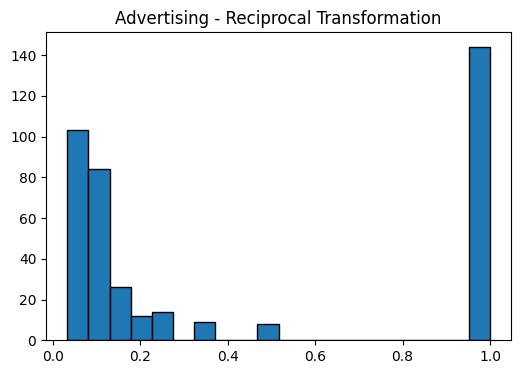

{'Advertising': np.float64(0.6395857712012682), 'Advertising_original': np.float64(0.6395857712012682), 'Advertising_log': np.float64(-0.19852549452098706), 'Advertising_square_root': np.float64(-0.056663767600609975), 'Advertising_cube_root': np.float64(-0.2893002242256945), 'Advertising_reciprocal': np.float64(0.5031731388524131)}


In [168]:
from scipy import stats

transformations = {
    "Original": lambda x: x,
    "Log": lambda x: np.log1p(x),
    "Square Root": lambda x: np.sqrt(x),
    "Cube Root": lambda x: np.cbrt(x),
    "Reciprocal": lambda x: 1 / (x + 1),  # +1 to avoid division by zero
    }
   

# Apply transformations and plot
for name, func in transformations.items():
    transformed = func(company_data['Advertising'])
    company_data[f'Advertising_{name.replace(" ", "_").lower()}'] = transformed
    
    plt.figure(figsize=(6,4))
    plt.hist(transformed, bins=20, edgecolor='black')
    plt.title(f"Advertising - {name} Transformation")
    plt.show()

# Check skewness of all versions
skew_values = {col: company_data[col].skew() for col in company_data.columns if 'Advertising' in col}
print(skew_values)

#### Conclusion : The root square transformation looks better. so keep only this one

In [169]:
company_data.drop(columns=['Advertising_log', 'Advertising_cube_root', 'Advertising_reciprocal', 'Advertising_original', 'Advertising'], inplace=True)

In [170]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Population', 'Price', 'ShelveLoc',
       'Age', 'Education', 'Urban', 'US', 'Advertising_square_root'],
      dtype='object')

### 'Shelveloc' , 'Urban' and 'US' are object type data type

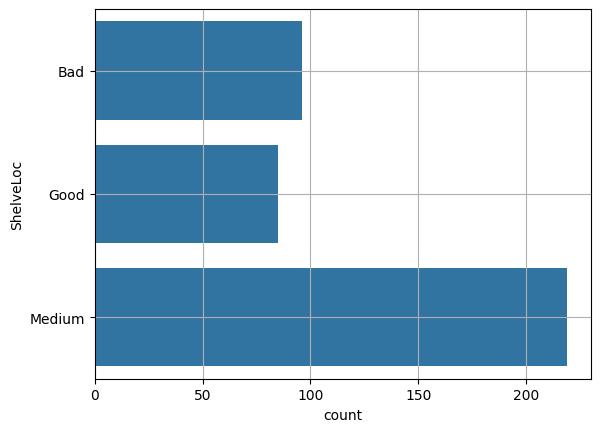

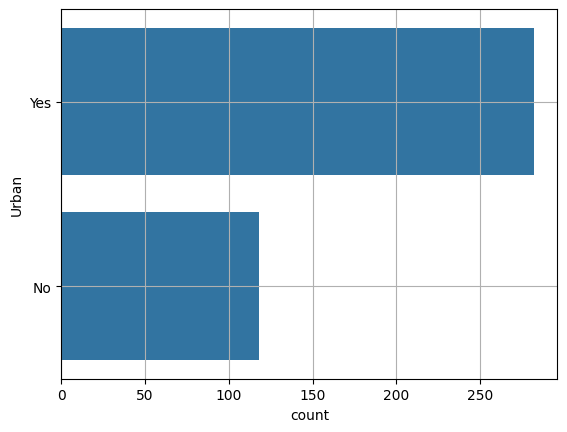

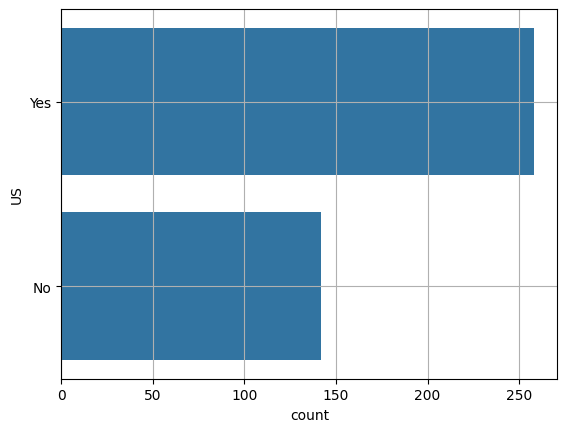

In [171]:
#count plot
sns.countplot(company_data['ShelveLoc'])
plt.grid(True)
plt.show()

sns.countplot(company_data['Urban'])
plt.grid(True)
plt.show()

sns.countplot(company_data['US'])
plt.grid(True)
plt.show()

#### Converting Target varible to Category

In [172]:
#sales min and max
print("Sales Min:", company_data.Sales.min())
print("Sales Max:", company_data.Sales.max())

Sales Min: 0.0
Sales Max: 16.27


### that's why we can convert 'Sales' variable into categories such that
#### 0<sales<6      ----> Low
#### 6<sales<12   ------> Medium
#### 12<sales<17 ------->High

In [173]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
company_data['Sales'] = pd.cut(x=company_data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

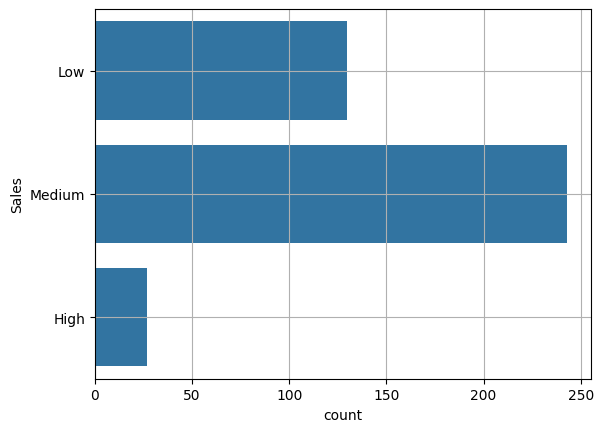

In [174]:
sns.countplot(company_data['Sales'])
plt.grid(True)
plt.show()

In [175]:
company_data['Sales'].value_counts()

Sales
Medium    243
Low       130
High       27
Name: count, dtype: int64

In [176]:
company_data.head()

,Sales,CompPrice,Income,Population,Price,ShelveLoc,Age,Education,Urban,US,Advertising_square_root
0,Medium,138,73,276,120,Bad,42,17,Yes,Yes,3.316625
1,Medium,111,48,260,83,Good,65,10,Yes,Yes,4.000000
2,Medium,113,35,269,80,Medium,59,12,Yes,Yes,3.162278
3,Medium,117,100,466,97,Medium,55,14,Yes,Yes,2.000000
4,Low,141,64,340,128,Bad,38,13,Yes,No,1.732051


# Label encoding for all categorical variable

In [177]:
from sklearn import preprocessing

In [178]:
company_data.head()

,Sales,CompPrice,Income,Population,Price,ShelveLoc,Age,Education,Urban,US,Advertising_square_root
0,Medium,138,73,276,120,Bad,42,17,Yes,Yes,3.316625
1,Medium,111,48,260,83,Good,65,10,Yes,Yes,4.000000
2,Medium,113,35,269,80,Medium,59,12,Yes,Yes,3.162278
3,Medium,117,100,466,97,Medium,55,14,Yes,Yes,2.000000
4,Low,141,64,340,128,Bad,38,13,Yes,No,1.732051


In [179]:
#encoding categorical company_data
label_encoder = preprocessing.LabelEncoder()

company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

company_data.head()


,Sales,CompPrice,Income,Population,Price,ShelveLoc,Age,Education,Urban,US,Advertising_square_root
0,2,138,73,276,120,0,42,17,1,1,3.316625
1,2,111,48,260,83,1,65,10,1,1,4.000000
2,2,113,35,269,80,2,59,12,1,1,3.162278
3,2,117,100,466,97,2,55,14,1,1,2.000000
4,1,141,64,340,128,0,38,13,1,0,1.732051


In [180]:
# # Map Sales values manually
# mapping = {'Low': 0, 'Medium': 1, 'High': 2}
# company_data['Sales'] = company_data['Sales'].map(mapping)

In [181]:
company_data['Sales'].unique()

array([2, 1, 0])

In [182]:
# Input and Output variables
X = company_data.drop('Sales', axis = 1)
y = company_data[['Sales']]

### Splitting the data

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [185]:
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (268, 10) 
 y_train_shape : (268, 1)


In [186]:
print('x_test_shape :',x_test.shape ,'\n y_test_shape :',y_test.shape)

x_test_shape : (132, 10) 
 y_test_shape : (132, 1)


# Building model by entropy Criterion

In [187]:
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model_entropy.fit(x_train, y_train) 

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


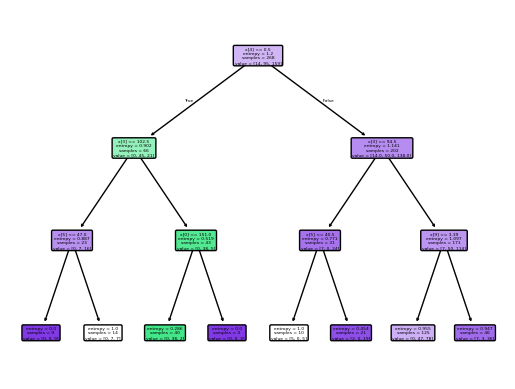

In [188]:
# Plotting Decision tree
from sklearn import tree
tree.plot_tree(model_entropy,filled=True, rounded=True)
plt.show()

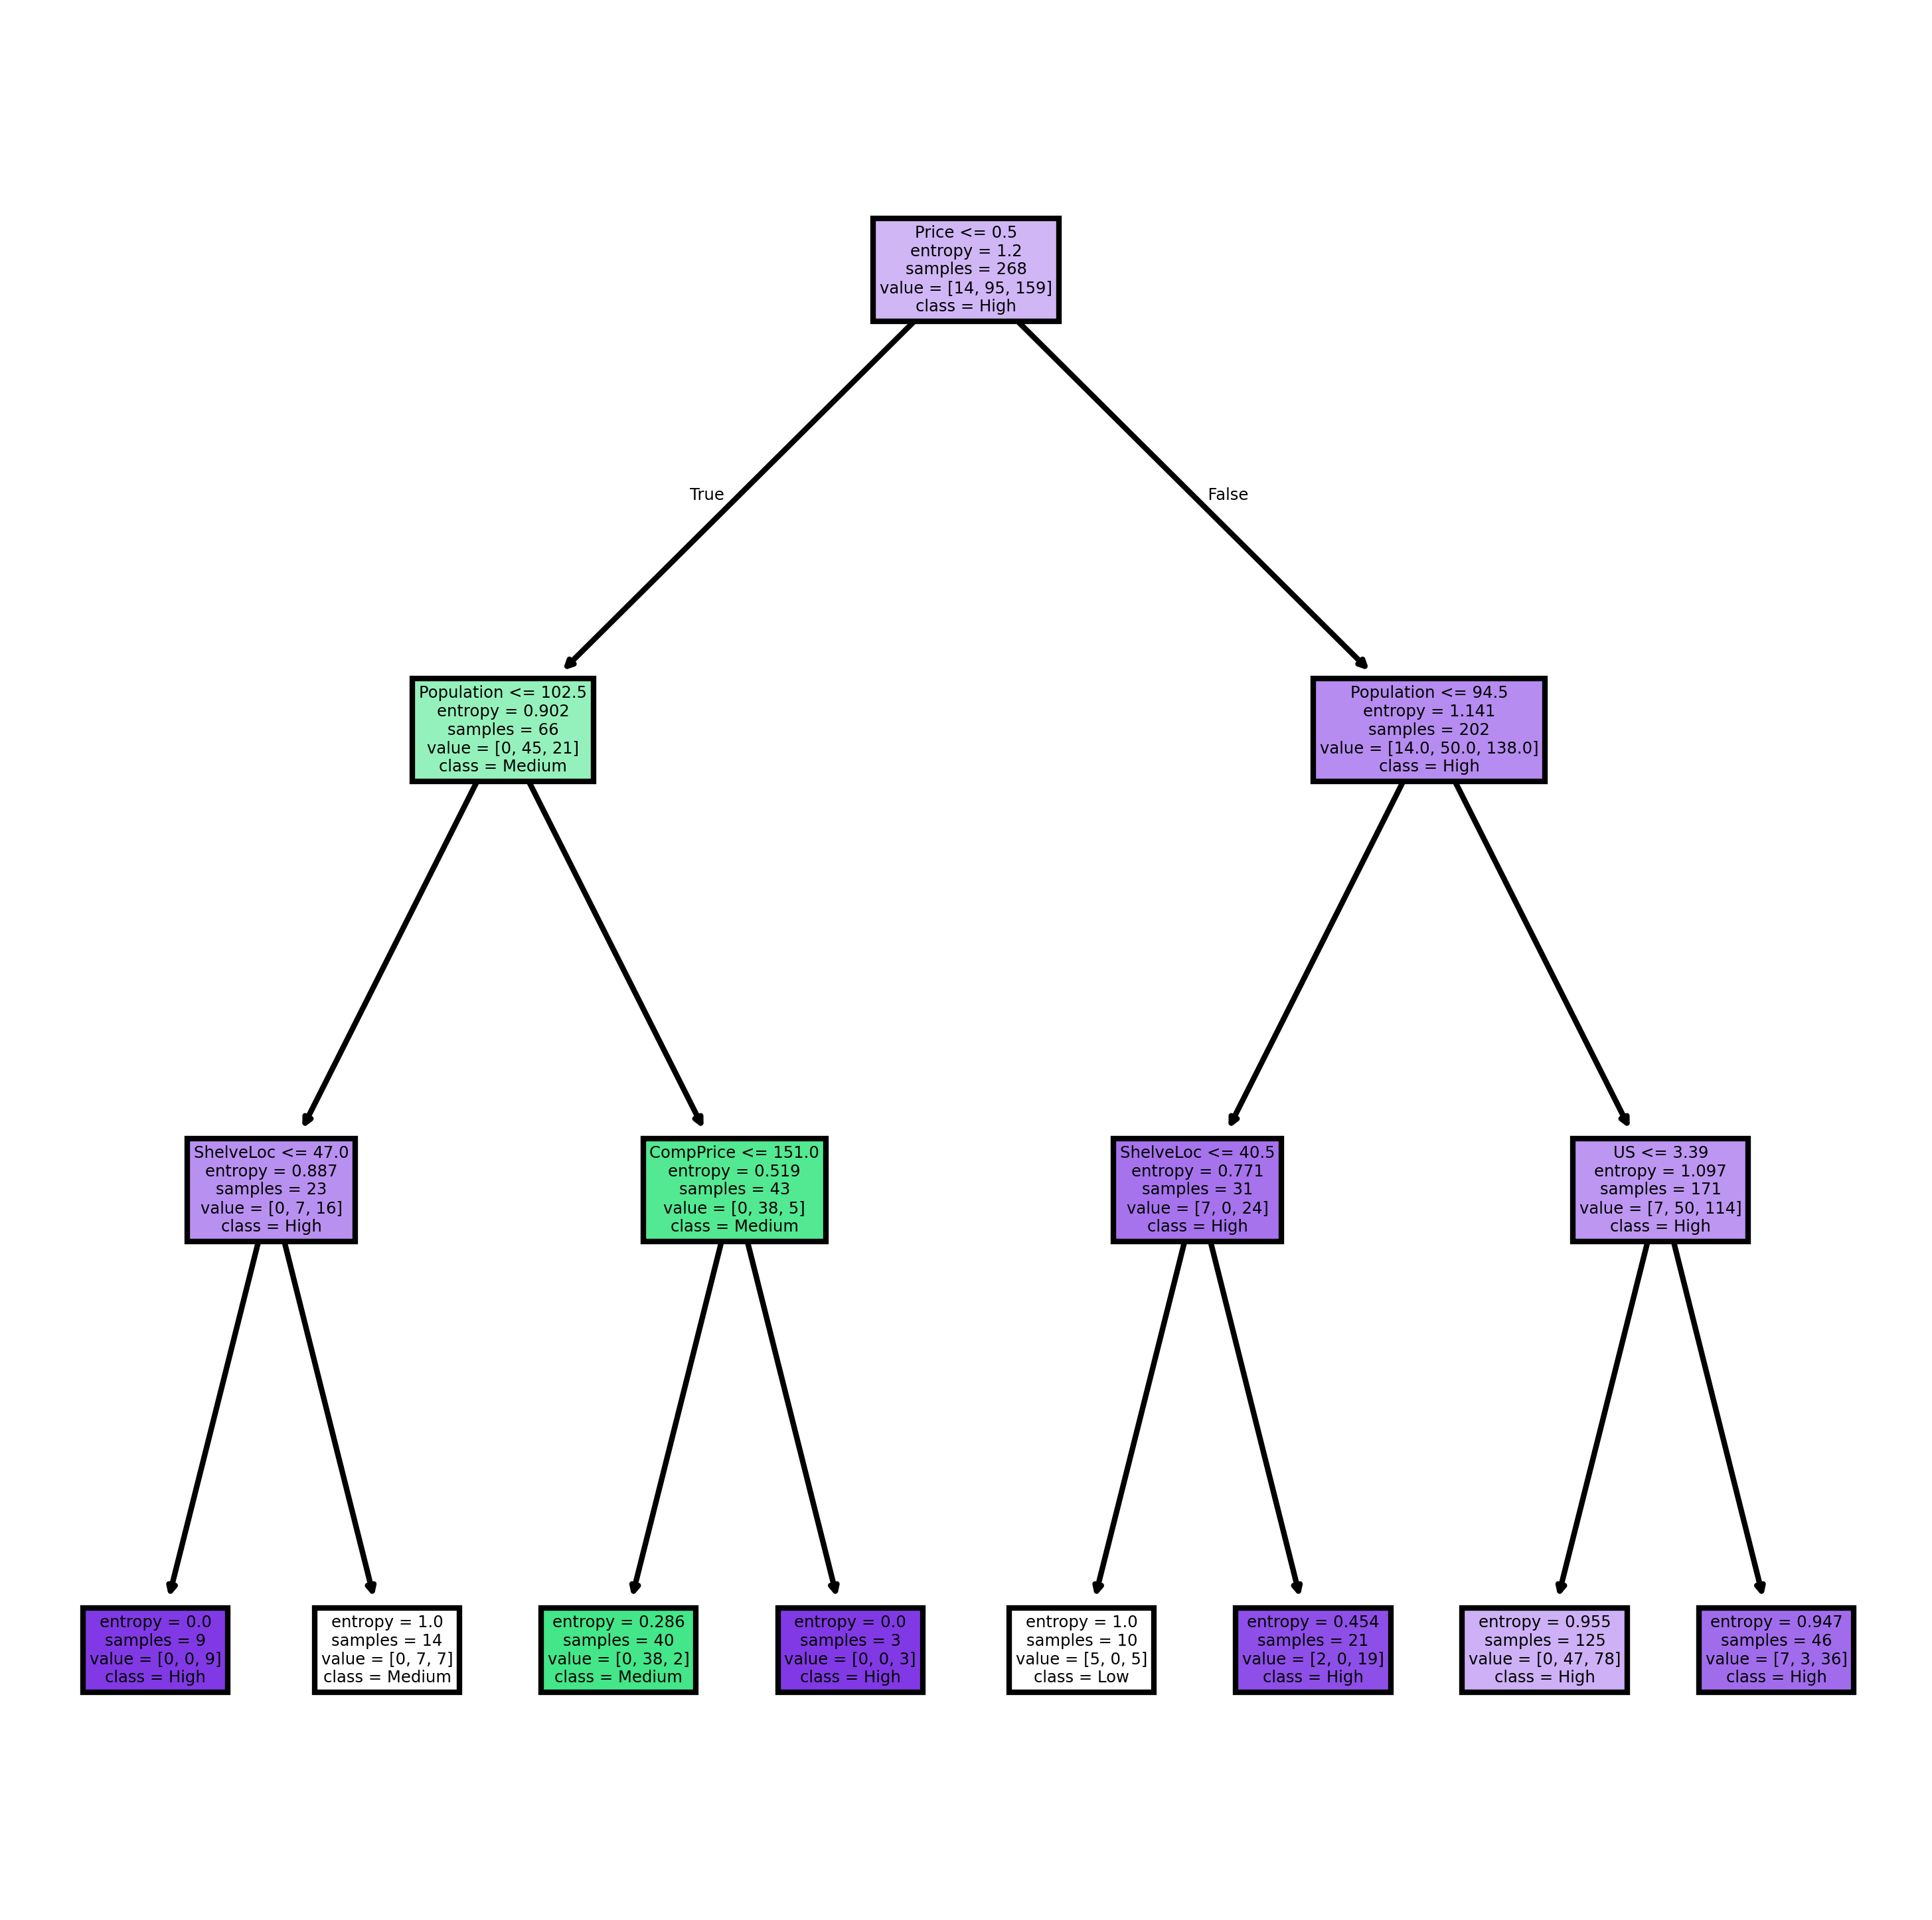

In [189]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [190]:
# Predicting company_data test data
pred_y_test = model_entropy.predict(x_test)
pred_y_test

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [191]:
pd.Series(pred_y_test).value_counts()

2    105
1     26
0      1
Name: count, dtype: int64

## accuracy score and confusion matrix

In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [193]:
# Checking accuracy of model
accuracy_score(y_test,pred_y_test)

0.6742424242424242

In [194]:
confusion_matrix(y_test,pred_y_test)

array([[ 1,  0, 12],
       [ 0, 15, 20],
       [ 0, 11, 73]])

In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y_test))

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.58      0.43      0.49        35
           2       0.70      0.87      0.77        84

    accuracy                           0.67       132
   macro avg       0.76      0.46      0.47       132
weighted avg       0.69      0.67      0.64       132



# Building model by Gini Criterion

In [196]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_gini.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


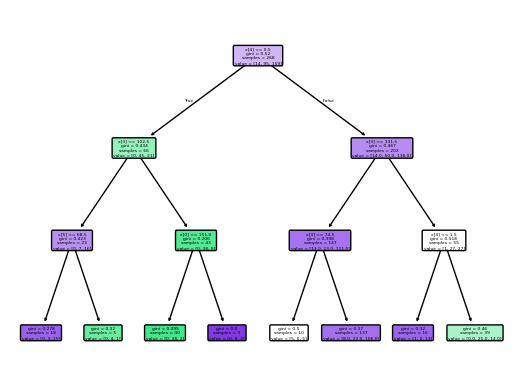

In [197]:
# Plotting Decision tree
tree.plot_tree(model_gini,filled=True, rounded=True)
plt.show()

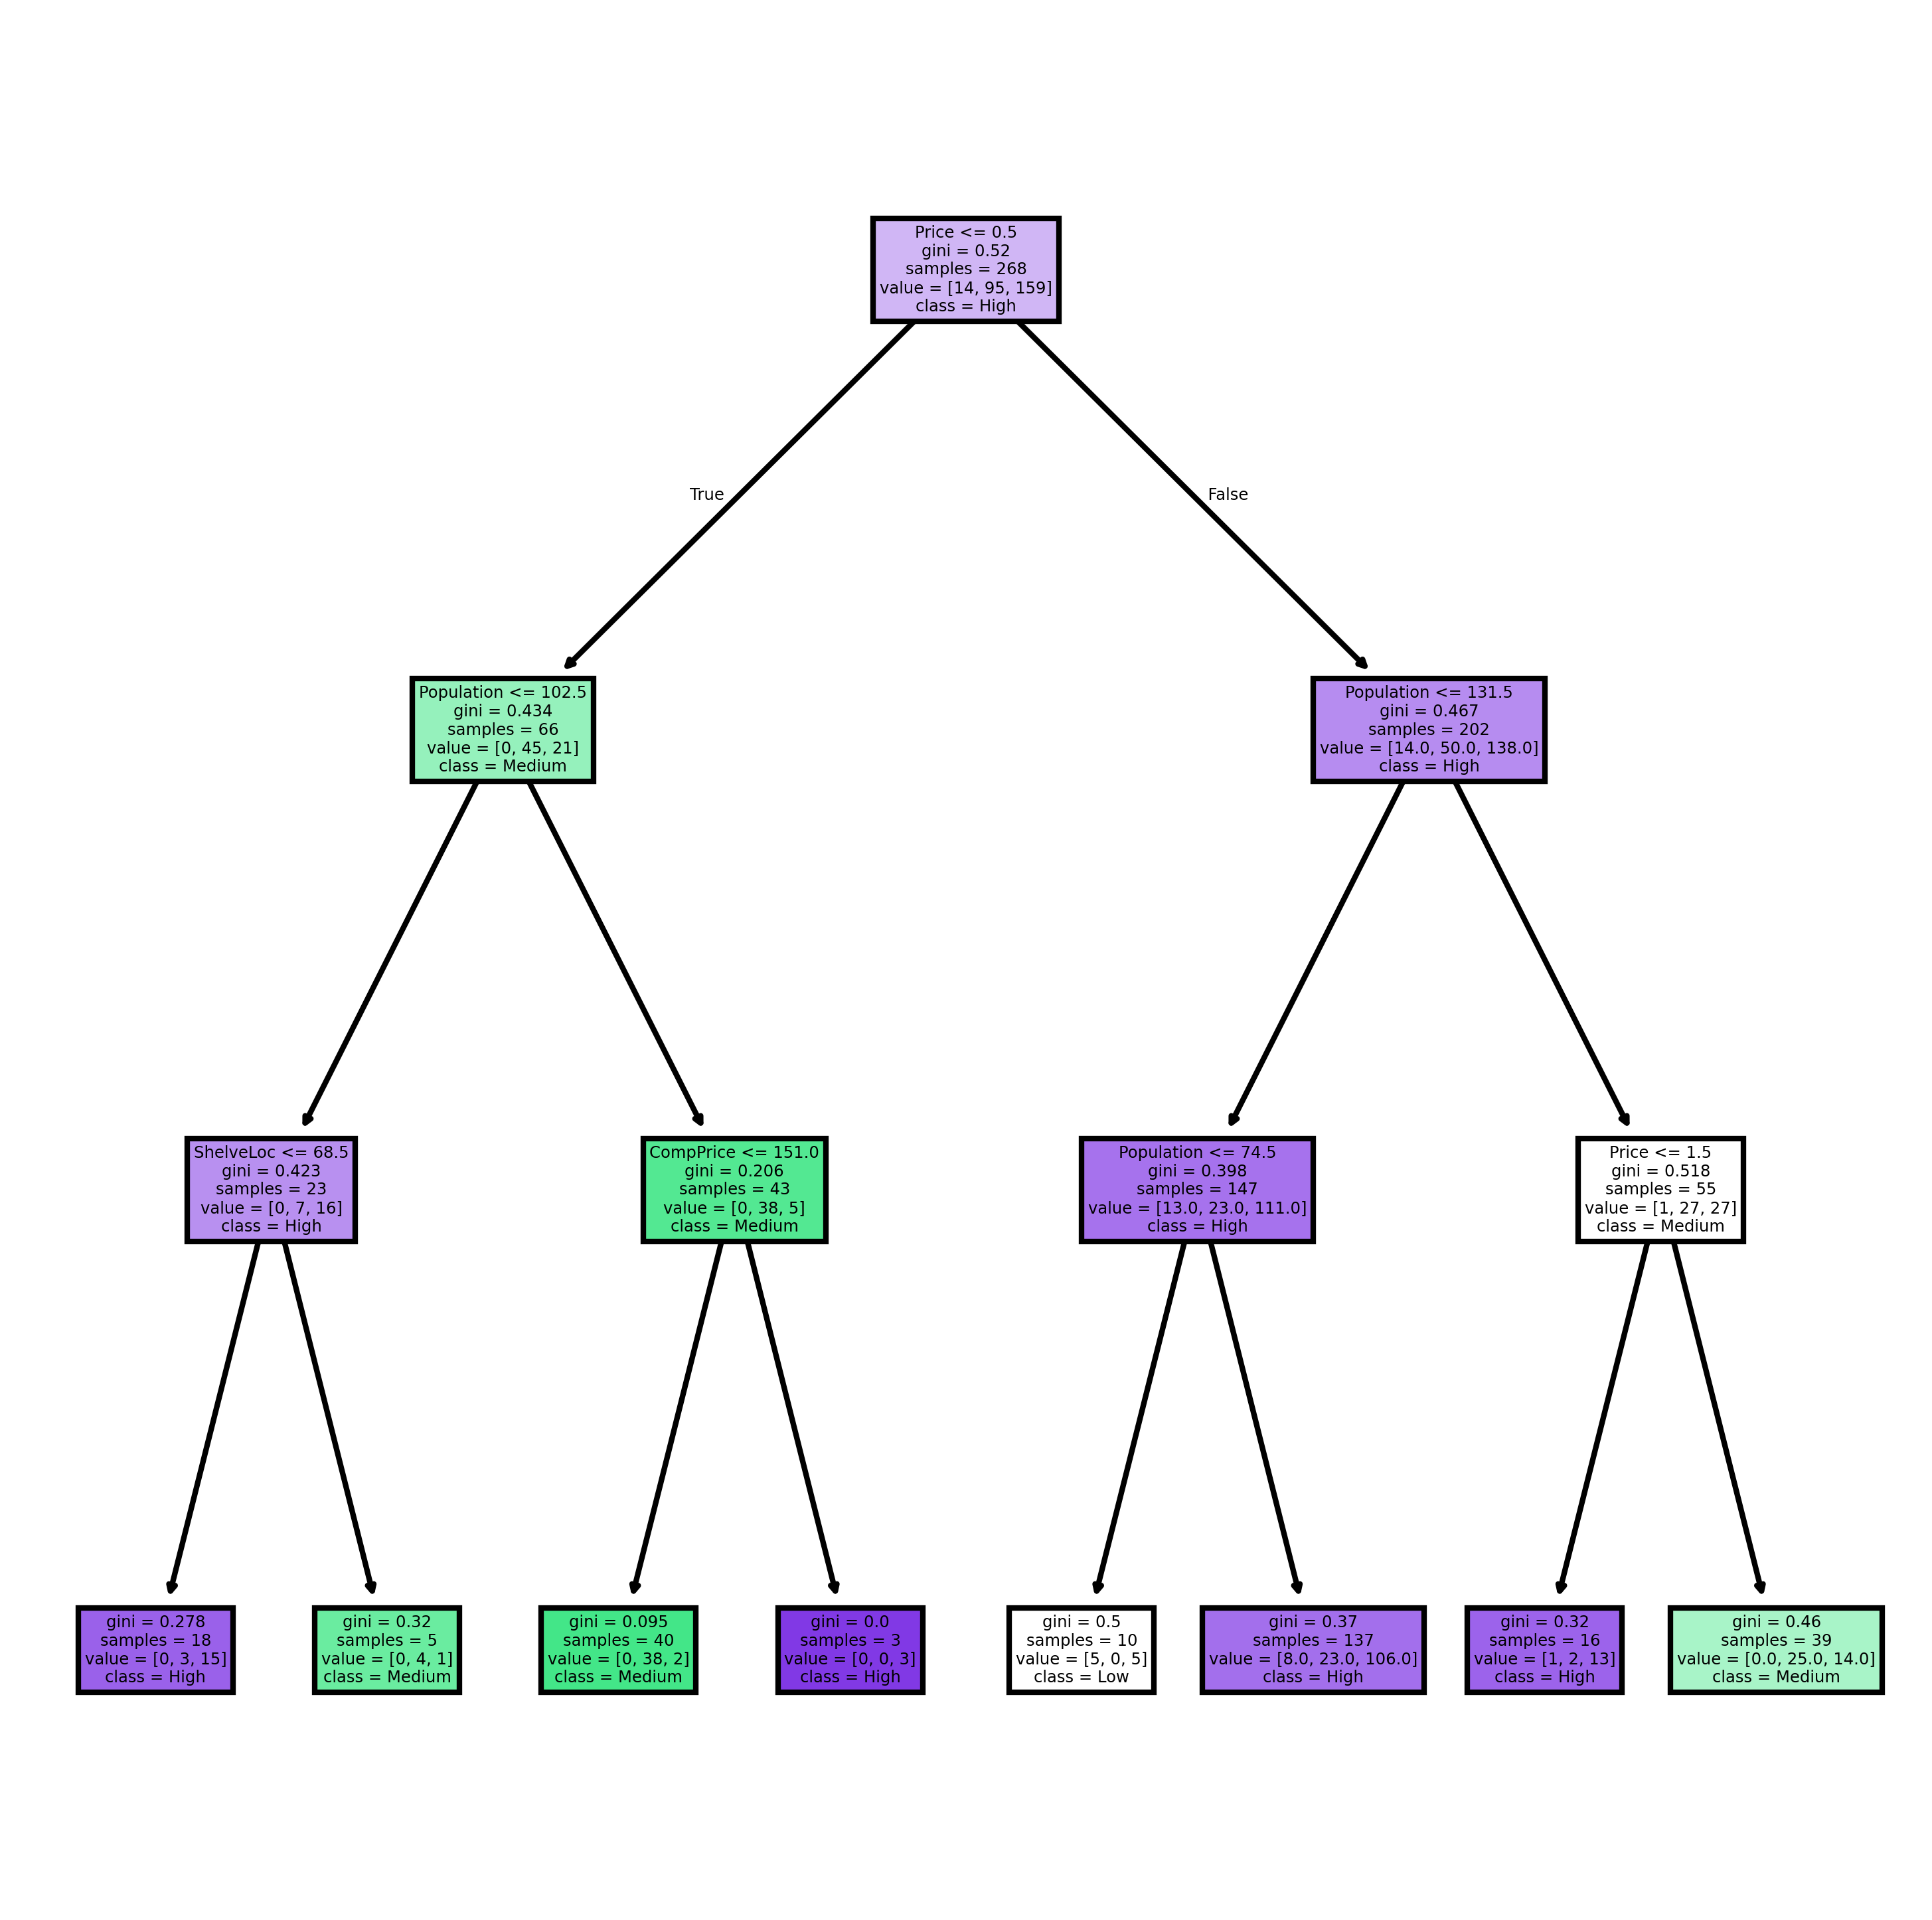

In [198]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [199]:
# Predicting company_data by gini 
pred_test_y_gini = model_gini.predict(x_test)
pred_test_y_gini

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [200]:
# Checking accuracy of model
accuracy_score(y_test,pred_test_y_gini)

0.6893939393939394

In [201]:
confusion_matrix(y_test,pred_test_y_gini)

array([[ 2,  0, 11],
       [ 0, 23, 12],
       [ 3, 15, 66]])

## Conclusion: 
### when we use 'entropy' criterion and max_depth=3 we get 65% accuracy of the model.
###  while when we use 'gini' criterion and max_depth=3 we get 68% accuracy of the model.

## Hyperperameter tunning
### for selection of optimal criterion between 'entropy' and 'gini' and max_depth selection.

In [202]:
#libararies
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [203]:
model=DecisionTreeClassifier()

In [204]:
param_grid=[{'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 7]}]
gsv=GridSearchCV(model, param_grid, cv=10)
gsv.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"[{'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [205]:
gsv.best_params_, gsv.best_score_

({'criterion': 'entropy', 'max_depth': 7}, np.float64(0.7055555555555555))

### we get our optimal values of hyperperameter such that 'criterion': 'entropy', 'max_depth': 7

In [206]:
final_model=DecisionTreeClassifier(criterion='entropy', max_depth=7)
final_model.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


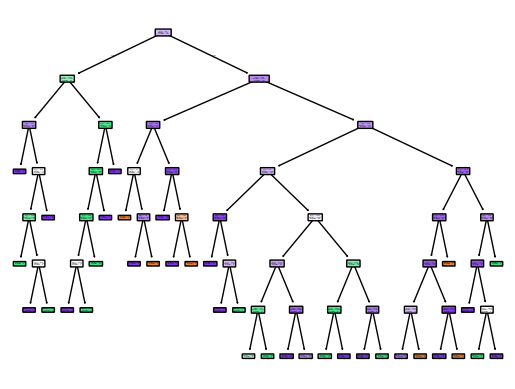

In [207]:
# Plotting Decision tree
tree.plot_tree(final_model,filled=True, rounded=True)
plt.show()

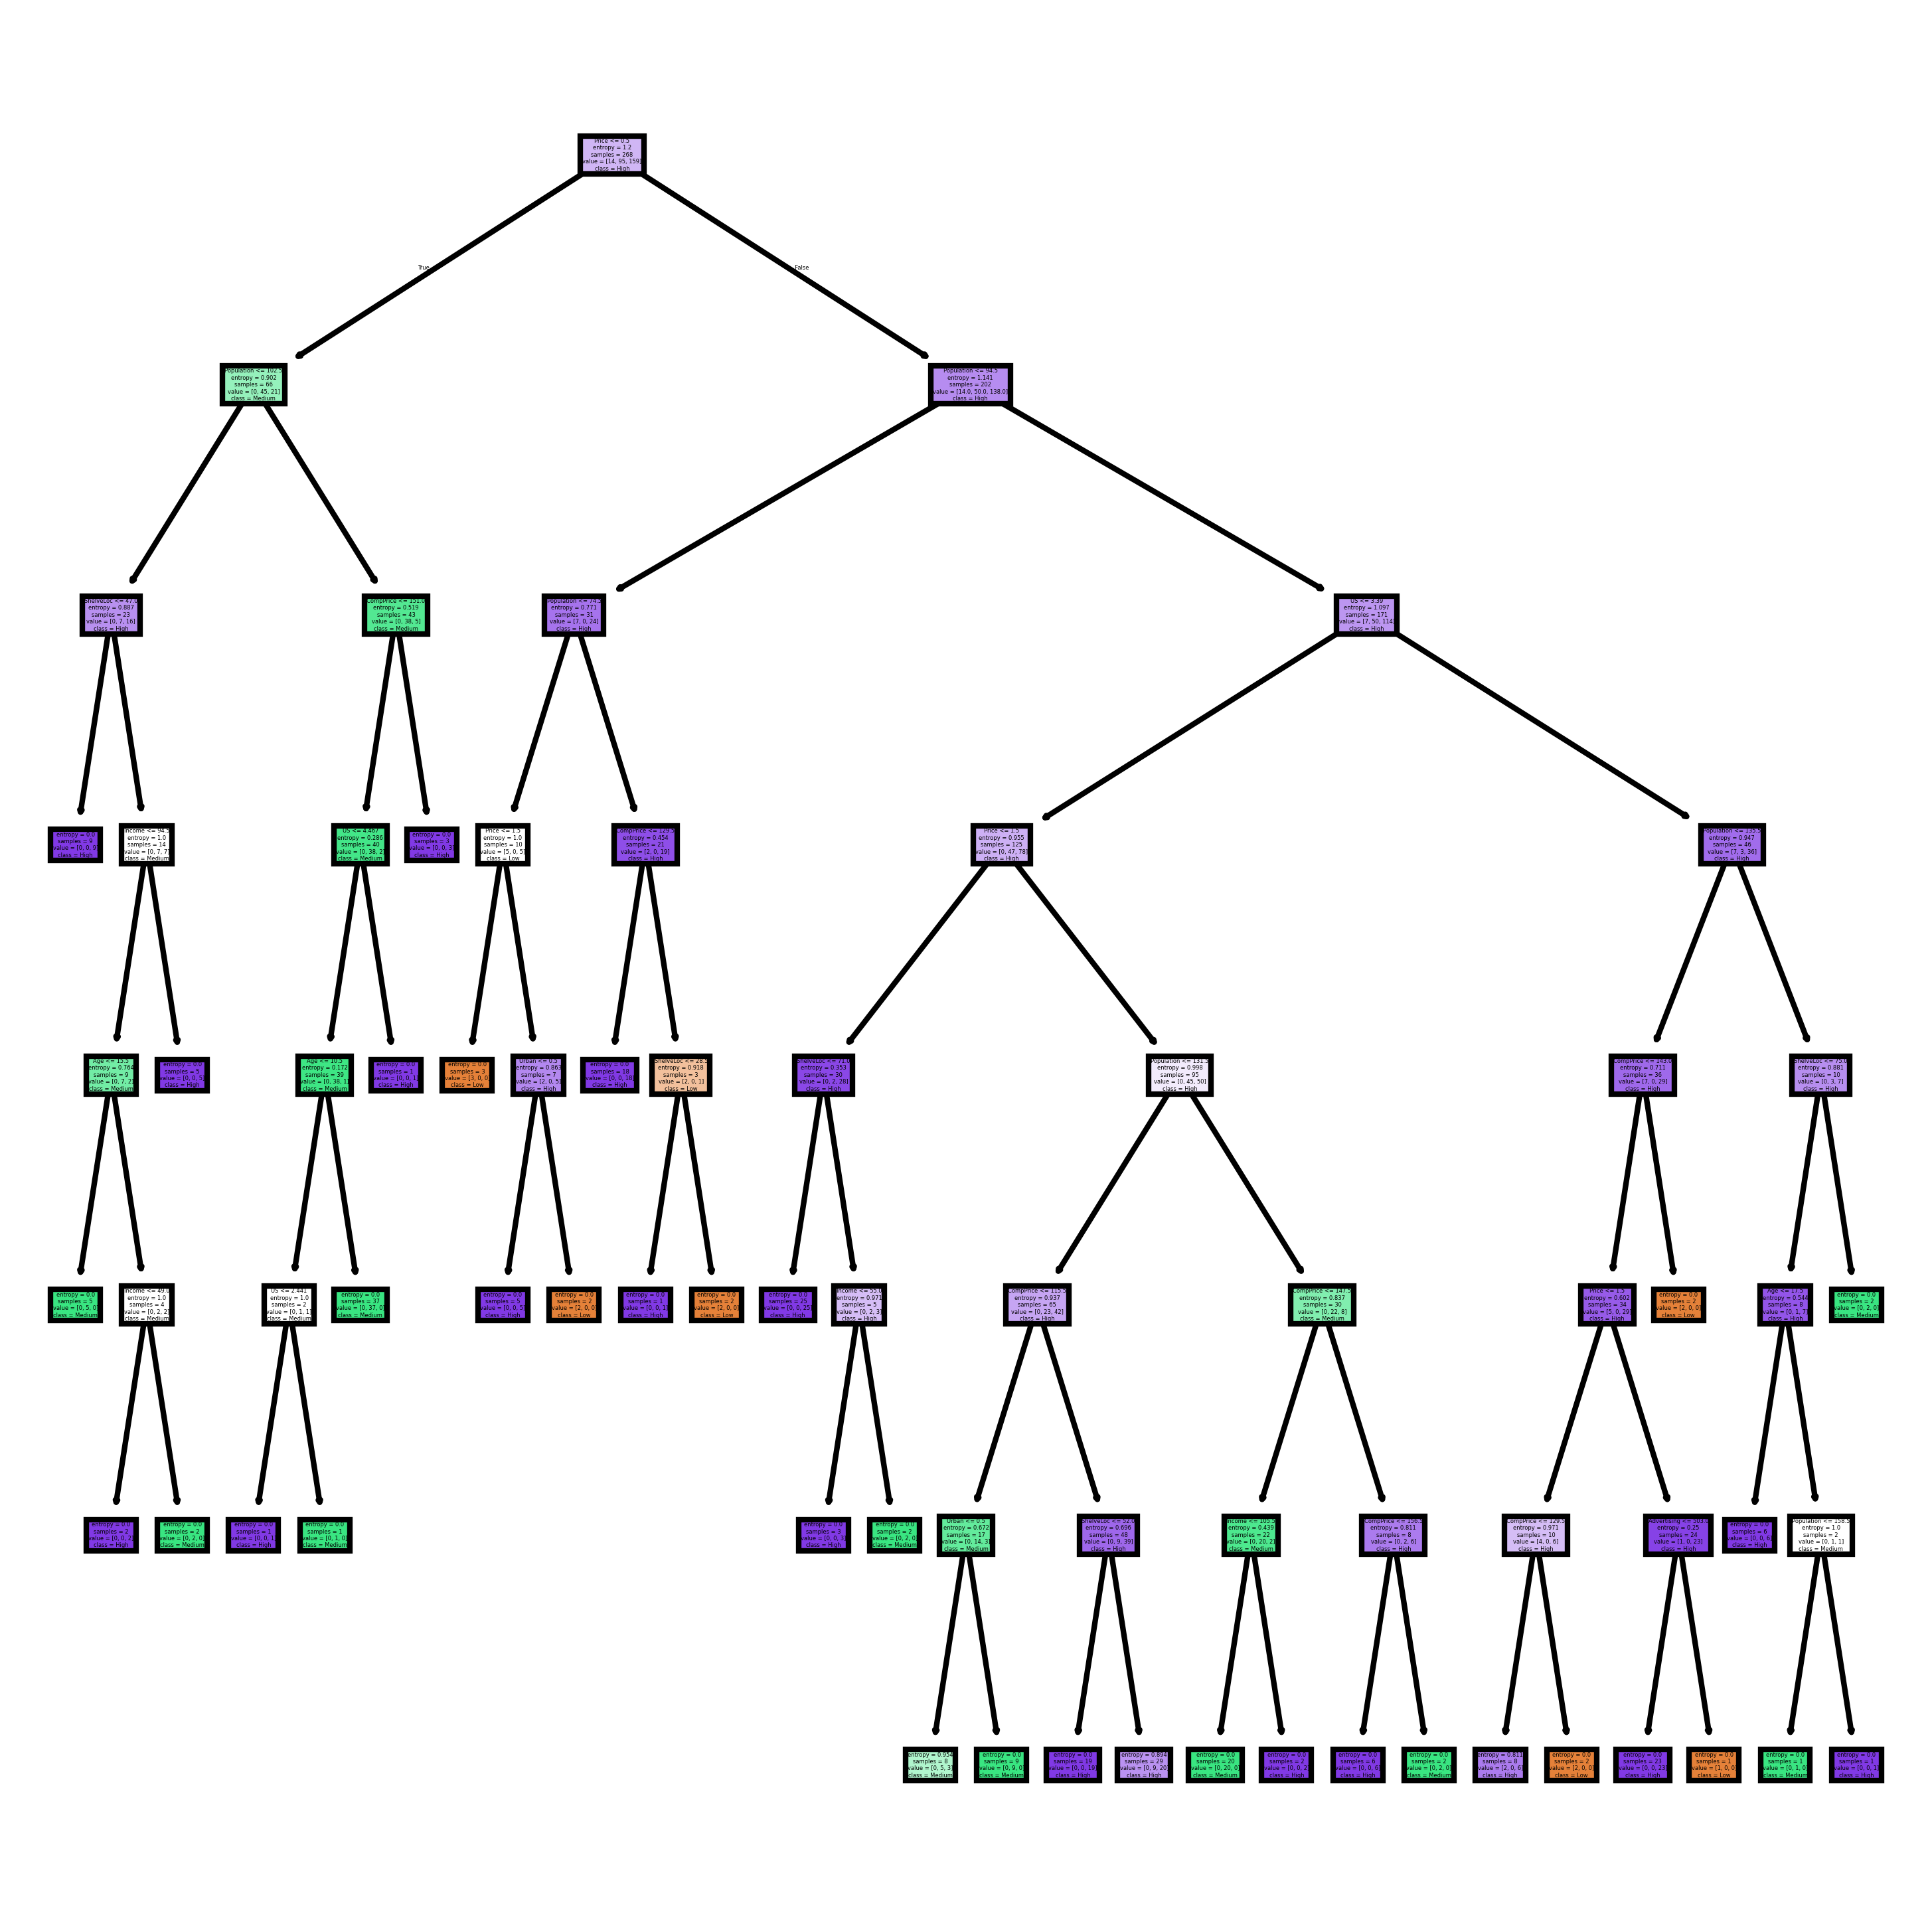

In [208]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(final_model,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [209]:
#predixtion on test data
y_pred=final_model.predict(x_test)
y_pred

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [210]:
# accuracy score
accuracy_score(y_test, y_pred)

0.7045454545454546

In [211]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  6],
       [ 0, 22, 13],
       [ 4, 16, 64]])

## now we get the accuracy of 66% with max_depth of 7.

### Now infereing on final model

In [212]:
company_data.head()

,Sales,CompPrice,Income,Population,Price,ShelveLoc,Age,Education,Urban,US,Advertising_square_root
0,2,138,73,276,120,0,42,17,1,1,3.316625
1,2,111,48,260,83,1,65,10,1,1,4.000000
2,2,113,35,269,80,2,59,12,1,1,3.162278
3,2,117,100,466,97,2,55,14,1,1,2.000000
4,1,141,64,340,128,0,38,13,1,0,1.732051


In [214]:
# Create the sample dataset
data = pd.DataFrame({
   
    'CompPrice': [138, 111, 113, 117, 141],
    'Income': [73, 48, 35, 100, 64],
    'Advertising': [11, 16, 10, 4, 3],
    'Population': [276, 260, 269, 466, 340],
    'Price': [120, 83, 80, 97, 128],
    'ShelveLoc': ['Bad', 'Good', 'Medium', 'Medium', 'Bad'],
    'Age': [42, 65, 59, 55, 38],
    'Education': [17, 10, 12, 14, 13],
    'Urban': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'US': ['Yes', 'Yes', 'Yes', 'Yes', 'No']
})

def dt_inference(model, df):
    df['Advertising_square_root'] = np.sqrt(df['Advertising'])
    df.drop(columns=['Advertising'], inplace=True)


    label_encoder = preprocessing.LabelEncoder()

  
    df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
    df['Urban'] = label_encoder.fit_transform(df['Urban'])
    df['US'] = label_encoder.fit_transform(df['US'])

    results=model.predict(df)
    prob_res=model.predict_proba(df)
    print("Probability of each class for the input samples:\n", prob_res)
    print("\n")


    return results

res=dt_inference(final_model, data)
for i in res:
    if i==1:
        print("Low")
    elif i==2:
        print("Medium")
    else:
        print("High")

Probability of each class for the input samples:
 [[0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.31034483 0.68965517]
 [0.         1.         0.        ]]


Low
Medium
Medium
Medium
Low


#### saving the model

In [215]:
import joblib
joblib.dump(final_model, 'Company_Sales_DT_Model.pkl')

['Company_Sales_DT_Model.pkl']